### 설명을 덧붙이는 주석
- annotate() 함수를 사용
 - 주석 내용(텍스트)를 넣을 위치와 정렬 방법 등을 전달
- arrowprops 옵션을 사용하면 텍스트 대신 화살표 표현 가능
 - 화살표 스타일, 시작점과 끝점의 좌표를 입력
- 예제에서는 주석을 넣을 여백 공간을 확보하기 위해서 ylim() 함수를 사용하여 y축의 범위 증가
- annotate() 함수를 사용하여 화살표와 텍스트의 위치를 잡아서 배치
 - 위치를 나타내는 (x, y) 좌표에서 x 값은 인덱스 번호 사용
   - x 위치에 '' (따옴표)로 묶어주어 값으로 표현가능
 - y 값에는 인구수 데이터 숫자값을 사용
 - rotation 옵션 사용하여 기울이기(양(+)의 회전 방향은 반시계 방향을 의미)

     전출지별     전입지별     1970     1971     1972     1973     1974     1975  \
19  서울특별시       전국  1448985  1419016  1210559  1647268  1819660  2937093   
21  서울특별시    부산광역시    11568    11130    11768    16307    22220    27515   
22  서울특별시    대구광역시        -        -        -        -        -        -   
23  서울특별시    인천광역시        -        -        -        -        -        -   
24  서울특별시    광주광역시        -        -        -        -        -        -   
25  서울특별시    대전광역시        -        -        -        -        -        -   
26  서울특별시    울산광역시        -        -        -        -        -        -   
27  서울특별시  세종특별자치시        -        -        -        -        -        -   
28  서울특별시      경기도   130149   150313    93333   143234   149045   253705   
29  서울특별시      강원도     9352    12885    13561    16481    15479    27837   
30  서울특별시     충청북도     6700     9457    10853    12617    11786    21073   
31  서울특별시     충청남도    15954    18943    23406    27139    25509    51205   
32  서울특별시   

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current

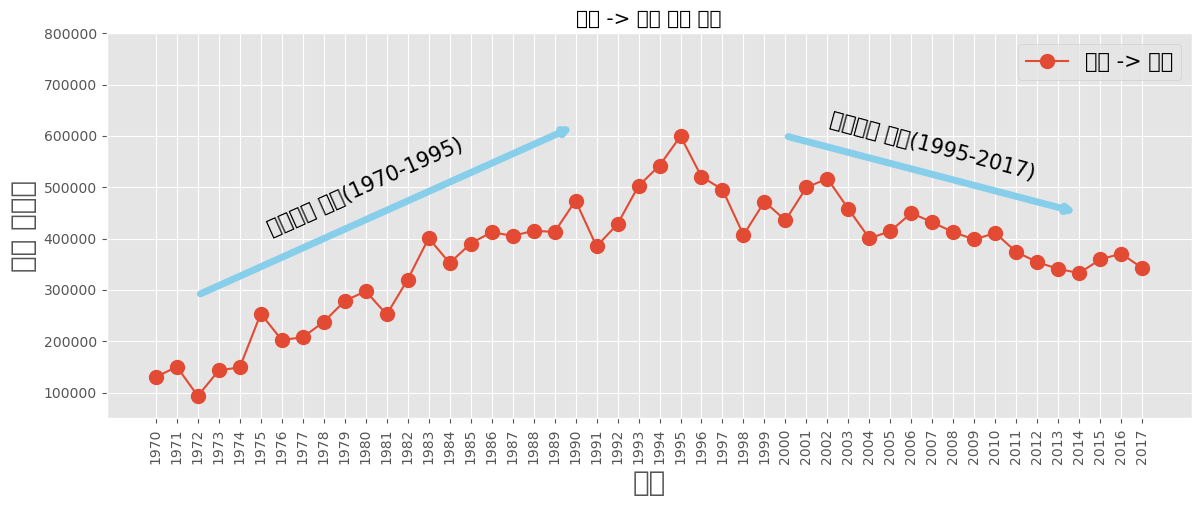

In [185]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# 시각화 전 엑셀데이터를 데이터프레임으로 변환
# header = 0 첫 열을 헤더로 사용하겠단 뜻, header = None은 맨위행 첫줄 없앤다는 뜻
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0) 

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill') # 옵션: 위에있는 값으로 채워주겠다.

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask] # True인 값만 요약해서 변수로 기입, False는 전부 삭제  
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
df_g = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈를 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot() 함수에 x,y 값 직접 입력
plt.plot(df_g.index, df_g.values, marker='o', markersize=10) # marker 옵션 추가 -> 마커 모양

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간', size=20)
plt.ylabel('인구 이동수', size=20)

# 범례 추가
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15) # loc는 위치옵션

# y축 범위 지정 (최소값, 최대값) -> 좀더 그래프 y축 커지게
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('', # 글자넣는곳
             xy=(20, 620000), # 화살표의 머리 부분(끝 지정) x값에 인덱스번호 가능
             xytext=('1972', 290000), # 화살표의 꼬리 부분(시작 지점) x값에 인덱스 이름도 가능
             xycoords='data', # 좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), # 화살표 모양, 색, 크기
            )

plt.annotate('', 
             xy=(44, 450000), # 화살표의 머리 부분(끝 지정) x값에 인덱스번호 가능
             xytext=(30, 600000), # 화살표의 꼬리 부분(시작 지점) x값에 인덱스 이름도 가능
             xycoords='data', # 좌표체계 default 값: datab
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), # 화살표 모양, 색, 크기
            )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)', # 텍스트 입력
             xy=(10, 500000), # 텍스트 위치 기준점(중간)
             rotation=24, # 텍스트 회전 각도
             va='center', # 텍스트 상하 정렬('center', 'top', 'bottom')
             ha='center', # 텍스트 좌우 정렬('center', 'left', 'right')
             fontsize=15
            )

plt.annotate('인구이동 감소(1995-2017)', # 텍스트 입력
             xy=(37, 580000), # 텍스트 위치 기준점(중간)
             rotation=-15, # 텍스트 회전 각도
             va='center', # 텍스트 상하 정렬('center', 'top', 'bottom')
             ha='center', # 텍스트 좌우 정렬('center', 'left', 'right')
             fontsize=15
            )

# 차트를 시각화
plt.show()

In [184]:
mask

0      False
1      False
2      False
3      False
4      False
       ...  
320    False
321    False
322    False
323    False
324    False
Length: 325, dtype: bool

- 1990년대 중반까지 서울 인구의 대규모 경기도 유입이 있었던 것을 확인 가능
- 1995년도를 정점으로 서울에서 경기도로 이동하는 인구가 계속 감소하고 있는 것을 확인 가능


In [4]:
# Matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 위 그래프 다시 실행하면 적용됨

### 화면을 분할하여 그래프 여러개 그리기 - axe 객체 활용
화면을 여러 개로 분할하고 분할된 각 화면에 서로 다른 그래프를 그리는 방법
- 여러 개의 axe 객체를 생성, 분할된 화면마다 axe 객체를 하나씩 배정
 - axe 객체는 각각 서로 다른 그래프 표현 가능
 - 한 화면에서 여러 개의 그래프를 비교하거나 다양한 정보를 동시에 보여줄 때 사용
- figure() 함수를 사용하여 그래프를 그리는 그림틀 생성
 - figsize 옵션을 사용하여 (가로, 세로) 그림틀 크리 지정 가능
 - fig 객체에 add_subplot() 함수를 적용하여 그림틀을 여러 개로 분할
- add_subplot() 함수 인자에 "행의 개수, 열의 개수, 서브플롯 순서"를 순서대로 입력
 - ex) ax1 = fig.add_subplot(2, 1, 1)
- 예제에서는 점으로만 구성된 그래프와 점, 선으로 구성된 그래프 두 개 생성

#### 화면을 분할하여 그래프 여러 개 그리기 예제

C:\Users\user\AppData\Local\Temp/ipykernel_3156/1684063039.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_g.index, rotation=90)
C:\Users\user\AppData\Local\Temp/ipykernel_3156/1684063039.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_g.index, rotation=90)


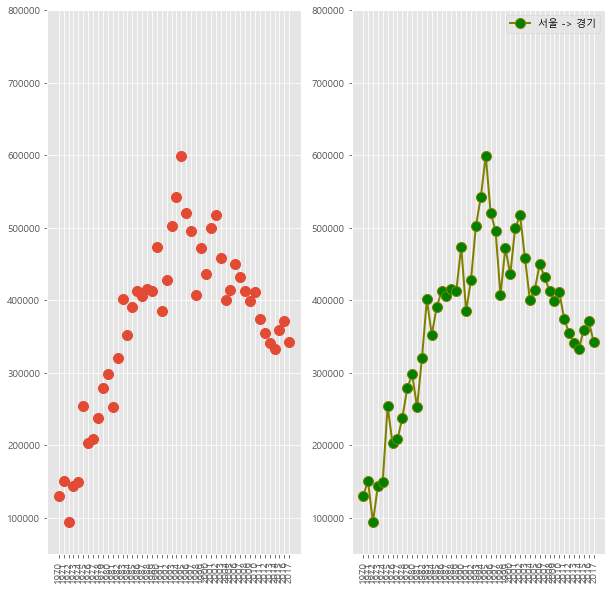

In [65]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# 시각화 전 엑셀데이터를 데이터프레임으로 변환
# header = 0 첫 열을 헤더로 사용하겠단 뜻, header = None은 맨위행 첫줄 없앤다는 뜻 과 다름
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0) 

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill') # 옵션: 위에있는 값으로 채워주겠다.

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask] # True인 값만 요약해서 변수로 기입
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
df_g = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(df_g, 'o', markersize=10) # 'o'는 마커모양 그냥 사용시 선 표시 없음
ax2.plot(df_g, marker='o', markerfacecolor='green', markersize=10, # marker로 마커모양과 선까지 생성
         color='olive', linewidth=2, label='서울 -> 경기' # color은 선의 색, label은 범례 지정
        )
ax2.legend(loc='best') # 범례 위치 지정

# y축 범위 지정
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨을 회전
ax1.set_xticklabels(df_g.index, rotation=90)
ax2.set_xticklabels(df_g.index, rotation=90)

plt.show()

앞에서 그린 두 번째 그래프에 제목과 축 이름 추가
- ax 객체에 set_title() 함수를 적용하여 제목 추가
- set_xlabel() 함수로 x축 이름 지정
- set_ylabel() 함수로 y축 이름 지정
- tick_params() 함수로 축 눈금 라벨의 크기


params 함수 사용하기

C:\Users\user\AppData\Local\Temp/ipykernel_3156/306078244.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_g.index, rotation=90)


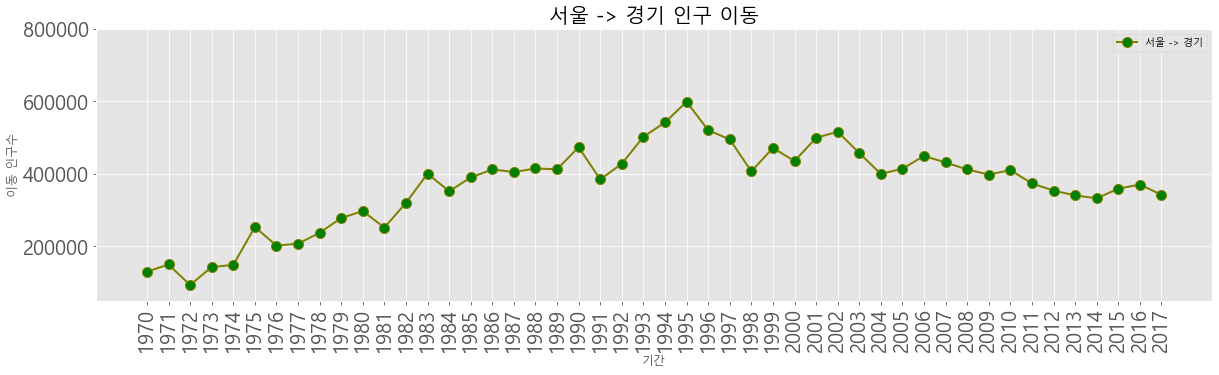

In [64]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# 시각화 전 엑셀데이터를 데이터프레임으로 변환
# header = 0 첫 열을 헤더로 사용하겠단 뜻, header = None은 맨위행 첫줄 없앤다는 뜻 과 다름
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0) 

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill') # 옵션: 위에있는 값으로 채워주겠다.

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask] # True인 값만 요약해서 변수로 기입
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
df_g = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)


# axe 객체에 plot 함수로 그래프 출력
ax.plot(df_g, marker='o', markerfacecolor='green', markersize=10, # marker로 마커모양과 선까지 생성
         color='olive', linewidth=2, label='서울 -> 경기' # color은 선의 색, label은 범례 지정
        )
ax.legend(loc='best') # 범례 위치 지정

# y축 범위 지정
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축 이름 추가 <<<<<<<<<<<<<<<<<<<
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨을 회전
ax.set_xticklabels(df_g.index, rotation=90)

# 축 눈금 라벨 크기 <<<<<<<<<<<<<<<<<<<<<<<
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.show()

#### 동일한 그림에 여러 개의 그래프를 추가
- 서울특별시에서 충청북도, 전라남도, 경상북도로 이동한 인구 변화 그래프 3개를 하나의 화면에 출력
- 각 지역에 해당하는 행을 선택, 선 그래프를 출력하는 plot() 메소드를 3번 적용


같은 화면에 그래프 추가하기 예제

C:\Users\user\AppData\Local\Temp/ipykernel_3156/451385570.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_g.index, rotation=90)


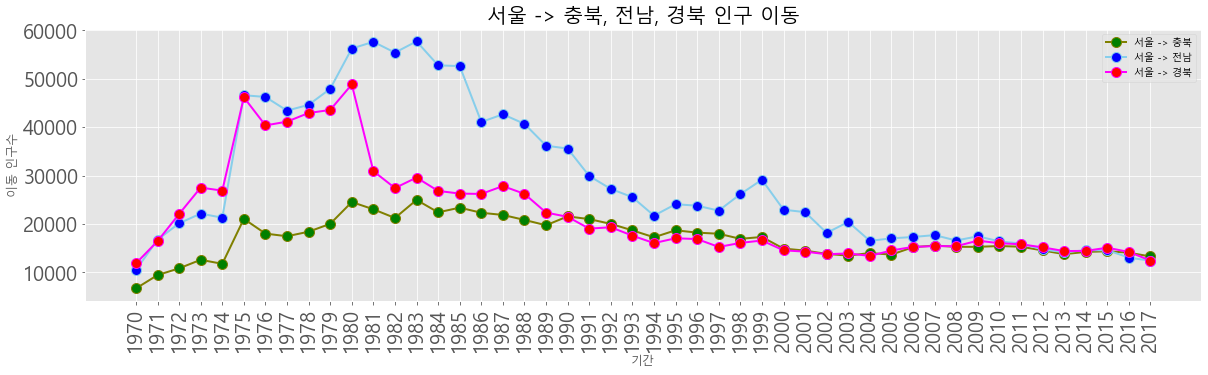

In [69]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# 시각화 전 엑셀데이터를 데이터프레임으로 변환
# header = 0 첫 열을 헤더로 사용하겠단 뜻, header = None은 맨위행 첫줄 없앤다는 뜻 과 다름
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0) 

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill') # 옵션: 위에있는 값으로 채워주겠다.

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask] # True인 값만 요약해서 변수로 기입
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청북도', '전라남도', '경상북도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot() 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청북도', :], marker='o', markerfacecolor='green', markersize=10, # marker로 마커모양과 선까지 생성
         color='olive', linewidth=2, label='서울 -> 충북' # color은 선의 색, label은 범례 지정
        )
ax.plot(col_years, df_3.loc['전라남도', :], marker='o', markerfacecolor='blue', markersize=10, # marker로 마커모양과 선까지 생성
         color='skyblue', linewidth=2, label='서울 -> 전남' # color은 선의 색, label은 범례 지정
        )
ax.plot(col_years, df_3.loc['경상북도', :], marker='o', markerfacecolor='red', markersize=10, # marker로 마커모양과 선까지 생성
         color='magenta', linewidth=2, label='서울 -> 경북' # color은 선의 색, label은 범례 지정
        )
ax.legend(loc='best') # 범례 위치 지정

# 차트 제목 추가
ax.set_title('서울 -> 충북, 전남, 경북 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨을 회전
ax.set_xticklabels(df_g.index, rotation=90)

# 축 눈금 라벨 크기 
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.show()

#### 화면 4분할 그래프 예제

C:\Users\user\AppData\Local\Temp/ipykernel_3156/3763326561.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_g.index, rotation=90)
C:\Users\user\AppData\Local\Temp/ipykernel_3156/3763326561.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_g.index, rotation=90)
C:\Users\user\AppData\Local\Temp/ipykernel_3156/3763326561.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(df_g.index, rotation=90)
C:\Users\user\AppData\Local\Temp/ipykernel_3156/3763326561.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(df_g.index, rotation=90)


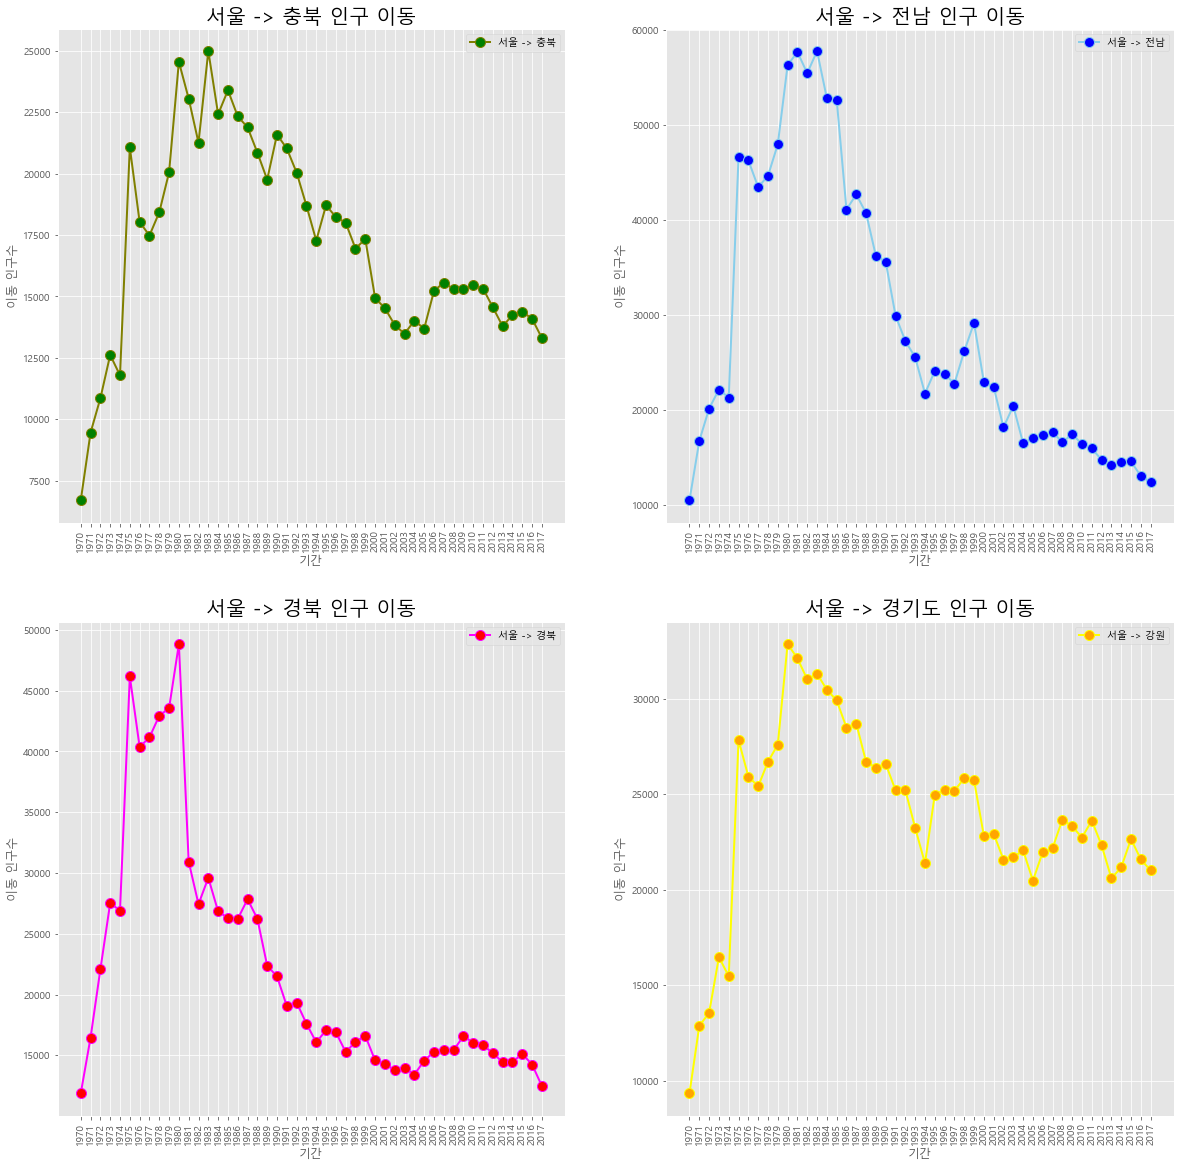

In [89]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# 시각화 전 엑셀데이터를 데이터프레임으로 변환
# header = 0 첫 열을 헤더로 사용하겠단 뜻, header = None은 맨위행 첫줄 없앤다는 뜻 과 다름
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0) 

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill') # 옵션: 위에있는 값으로 채워주겠다.

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask] # True인 값만 요약해서 변수로 기입
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청북도', '전라남도', '경상북도', '강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에 plot() 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청북도', :], marker='o', markerfacecolor='green', markersize=10, # marker로 마커모양과 선까지 생성
         color='olive', linewidth=2, label='서울 -> 충북' # color은 선의 색, label은 범례 지정
        )
ax2.plot(col_years, df_4.loc['전라남도', :], marker='o', markerfacecolor='blue', markersize=10, # marker로 마커모양과 선까지 생성
         color='skyblue', linewidth=2, label='서울 -> 전남' # color은 선의 색, label은 범례 지정
        )
ax3.plot(col_years, df_4.loc['경상북도', :], marker='o', markerfacecolor='red', markersize=10, # marker로 마커모양과 선까지 생성
         color='magenta', linewidth=2, label='서울 -> 경북' # color은 선의 색, label은 범례 지정
        )
ax4.plot(col_years, df_4.loc['강원도', :], marker='o', markerfacecolor='orange', markersize=10, # marker로 마커모양과 선까지 생성
         color='yellow', linewidth=2, label='서울 -> 강원' # color은 선의 색, label은 범례 지정
        )
ax1.legend(loc='best') # 범례 위치 지정
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 -> 충북 인구 이동', size=20)
ax2.set_title('서울 -> 전남 인구 이동', size=20)
ax3.set_title('서울 -> 경북 인구 이동', size=20)
ax4.set_title('서울 -> 경기도 인구 이동', size=20)

# 축 이름 추가 
ax1.set_xlabel('기간', size=12)
ax1.set_ylabel('이동 인구수', size=12)
ax2.set_xlabel('기간', size=12)
ax2.set_ylabel('이동 인구수', size=12)
ax3.set_xlabel('기간', size=12)
ax3.set_ylabel('이동 인구수', size=12)
ax4.set_xlabel('기간', size=12)
ax4.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨을 회전
ax1.set_xticklabels(df_g.index, rotation=90)
ax2.set_xticklabels(df_g.index, rotation=90)
ax3.set_xticklabels(df_g.index, rotation=90)
ax4.set_xticklabels(df_g.index, rotation=90)

# 축 눈금 라벨 크기 
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)
ax4.tick_params(axis='x', labelsize=10)
ax4.tick_params(axis='y', labelsize=10)

plt.show()

#### 부록 - 그래프 간격을 넓히고 싶은 경우
- 자동 조정
 - tight_layout() 함수
 - ex) fig.tight_layout()
 
- 직접 조정
 - subplots_adjust()
 - ex) plt.subplots_adjust()
   - 옵션: left, right, top, bottom, wspace(서브 플롯 사이의 좌우 예비공간), hspace(서브 플롯 사이의 상하 예비공간)

---
**Matplotlib에서 사용할 수 있는 색상 확인**


In [91]:
import matplotlib

# 컬러 정보를 받아올 변수
colors = {}

for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex
    
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

---
### 면적 그래프
면적 그래프(area plot)는 각 열의 데이터를 선 그래프로 구현, 선 그래프와 x축 사이의 공간에 색 적용
- 색의 투명도를 지정(기본값 : 0.5, 범위 : 0 ~ 1)
 - ex) alpha=0.2 옵션
- plot() 함수에 kind='area' 옵션을 추가
- 그래프를 누적할지의 여부 설정 가능(기본값 옵션 : stacked=True)
 - 각 열의 선 그래프를 다른 열의 선 그래프 위로 쌓아올리는 방식
 - 각 열의 패턴과 열 전체의 합계가 어떻게 변하는지 확인 가능
 - stacked=False 옵션 사용시 각 그래프들이 누적되지 않고 서로 겹치게 표시됨

#### 면적 그래프(stacked=False) 그리기 예제

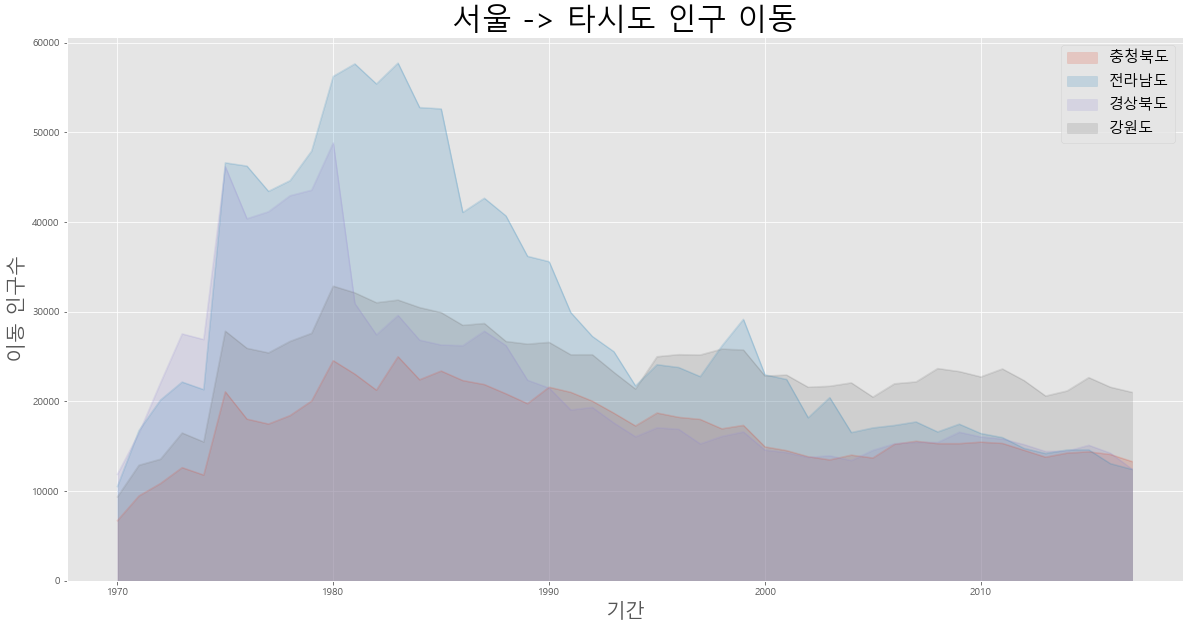

In [97]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# 시각화 전 엑셀데이터를 데이터프레임으로 변환
# header = 0 첫 열을 헤더로 사용하겠단 뜻, header = None은 맨위행 첫줄 없앤다는 뜻 과 다름
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0) 

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill') # 옵션: 위에있는 값으로 채워주겠다.

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask] # True인 값만 요약해서 변수로 기입
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청북도', '전라남도', '경상북도', '강원도'], col_years]
df_4 = df_4.T

# 스타일 서실 지정
plt.style.use('ggplot')

# 데이터프레임 인덱스를 정수형으로 변경 -> 정수형으로 만들면 x축이 시스템 간격대로 표시됨
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

#### 면적 그래프(stacked=True) 그리기 예제

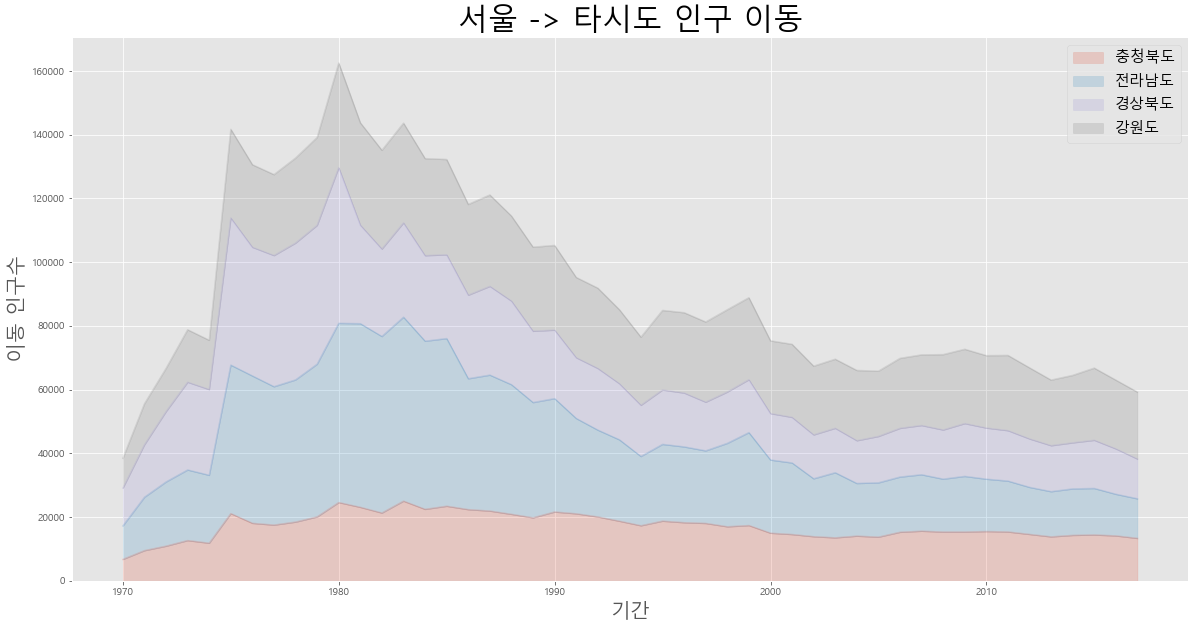

In [98]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# 시각화 전 엑셀데이터를 데이터프레임으로 변환
# header = 0 첫 열을 헤더로 사용하겠단 뜻, header = None은 맨위행 첫줄 없앤다는 뜻 과 다름
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0) 

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill') # 옵션: 위에있는 값으로 채워주겠다.

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask] # True인 값만 요약해서 변수로 기입
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청북도', '전라남도', '경상북도', '강원도'], col_years]
df_4 = df_4.T

# 스타일 서실 지정
plt.style.use('ggplot')

# 데이터프레임 인덱스를 정수형으로 변경 -> 정수형으로 만들면 x축이 시스템 간격대로 표시됨
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

#### axe 객체(ax)의 세부적인 요소 설정 가능
- axe 객체의 속성을 이용하여 제목, 축 이름 설정 가능

axe 객체 속성 변경하기 예제

<class 'matplotlib.axes._subplots.AxesSubplot'>


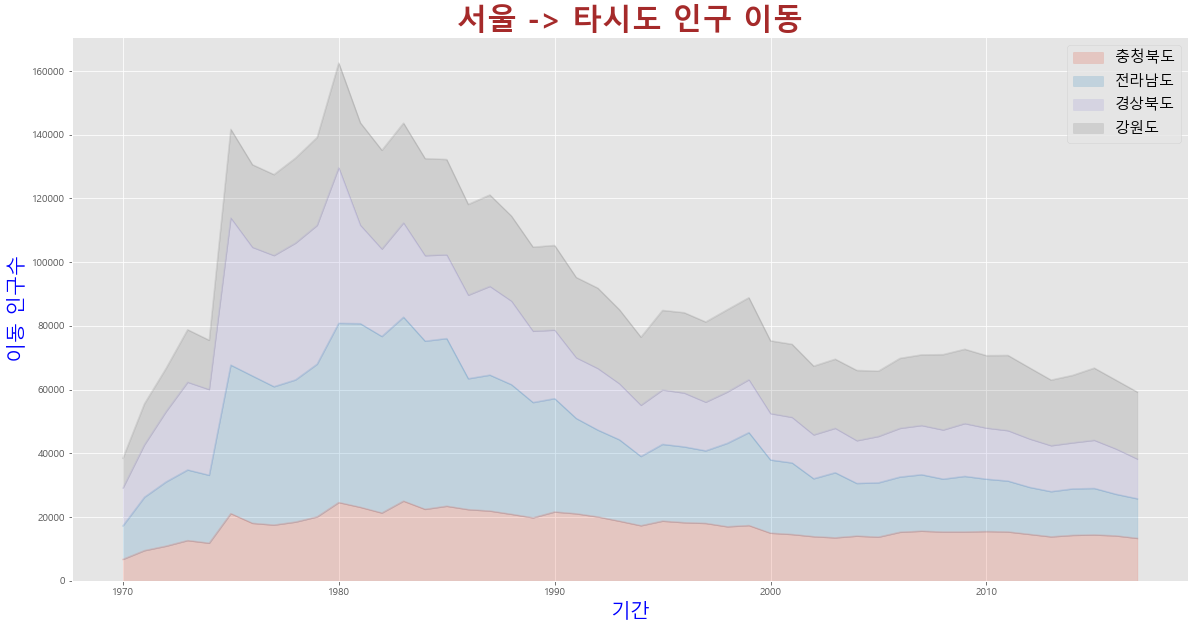

In [105]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# 시각화 전 엑셀데이터를 데이터프레임으로 변환
# header = 0 첫 열을 헤더로 사용하겠단 뜻, header = None은 맨위행 첫줄 없앤다는 뜻 과 다름
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0) 

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill') # 옵션: 위에있는 값으로 채워주겠다.

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask] # True인 값만 요약해서 변수로 기입
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청북도', '전라남도', '경상북도', '강원도'], col_years]
df_4 = df_4.T

# 스타일 서실 지정
plt.style.use('ggplot')

# 데이터프레임 인덱스를 정수형으로 변경 -> 정수형으로 만들면 x축이 시스템 간격대로 표시됨
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기 <<<<<
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_xlabel('기간', size=20, color='blue')
ax.set_ylabel('이동 인구수', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()

---
## 막대 그래프
막대 그래프(bar plot)는 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현
- 세로형 막대 그래프와 가로형 막대 그래프
 - 세로형 막대 그래프는 큰 차이는 X
 - 데이터 값의 차이를 효과적으로 설명 가능
- plot() 함수에 kind = 'bar' 옵션 입력

세로형 막대 그래프 예제

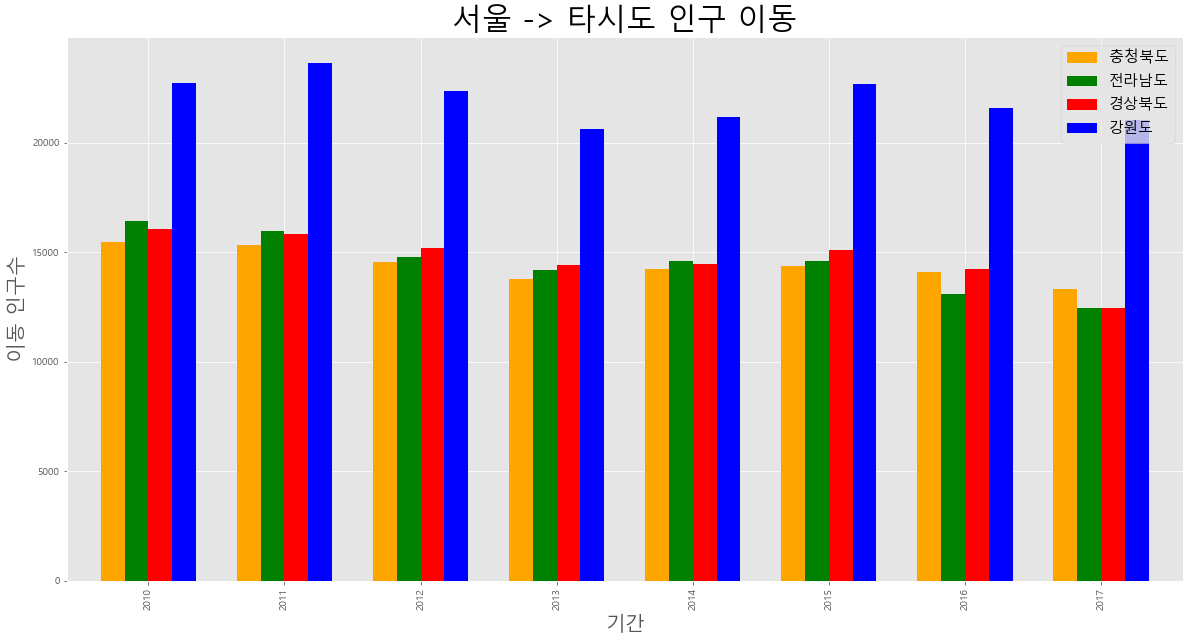

In [114]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# 시각화 전 엑셀데이터를 데이터프레임으로 변환
# header = 0 첫 열을 헤더로 사용하겠단 뜻, header = None은 맨위행 첫줄 없앤다는 뜻 과 다름
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0) 

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill') # 옵션: 위에있는 값으로 채워주겠다.

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask] # True인 값만 요약해서 변수로 기입
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청북도', '전라남도', '경상북도', '강원도'], col_years]
df_4 = df_4.T

# 스타일 서실 지정
plt.style.use('ggplot')

# 데이터프레임 인덱스를 정수형으로 변경 -> 정수형으로 만들면 x축이 시스템 간격대로 표시됨
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기 <<<<<
ax = df_4.plot(kind='bar', figsize=(20, 10), width=0.7,
              color=['orange', 'green', 'red', 'blue']
              )

ax.set_title('서울 -> 타시도 인구 이동', size=30, )
ax.set_xlabel('기간', size=20,)
ax.set_ylabel('이동 인구수', size=20,)
ax.legend(loc='best', fontsize=15)

plt.show()

가로형 막대 그래프
- plot() 함수에 kind='barh'를 입력

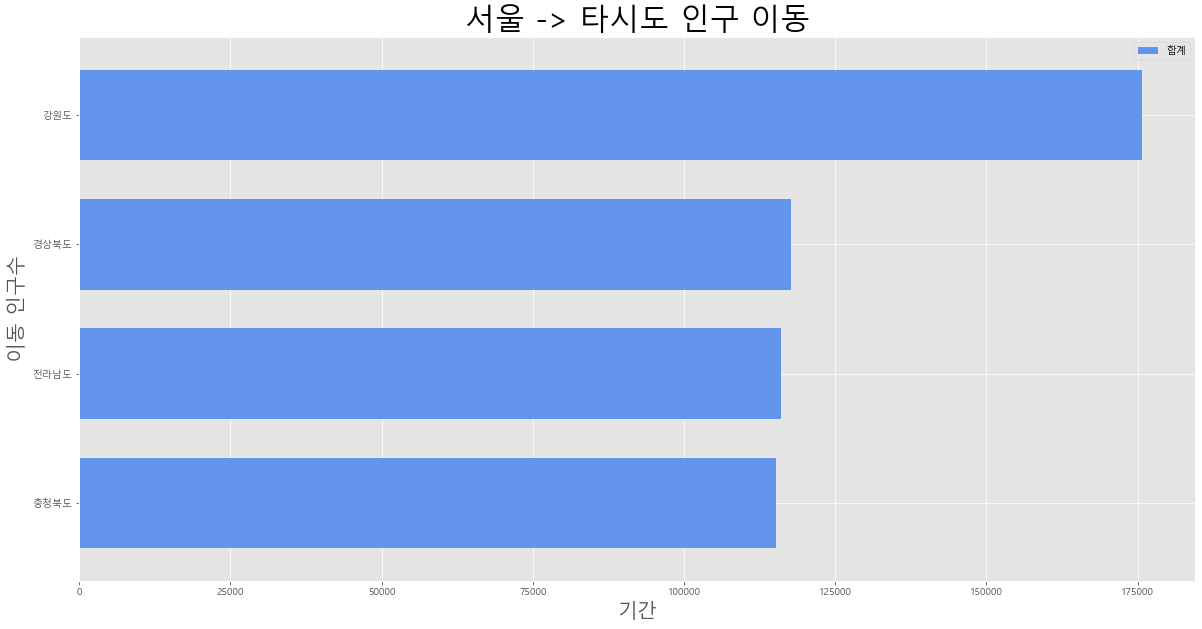

In [127]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# 시각화 전 엑셀데이터를 데이터프레임으로 변환
# header = 0 첫 열을 헤더로 사용하겠단 뜻, header = None은 맨위행 첫줄 없앤다는 뜻 과 다름
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0) 

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill') # 옵션: 위에있는 값으로 채워주겠다.

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask] # True인 값만 요약해서 변수로 기입
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청북도', '전라남도', '경상북도', '강원도'], col_years]

# 2010-2017년 이동 인구 수를 합계하여 새로운 컬럼 '합계' 추가
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 보기편하게 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True) # [['합계']] 두개로 묶은 이유는 값이 여러개이기때문

# 스타일 서실 지정
plt.style.use('ggplot')

# 면적 그래프 그리기 <<<<<
ax = df_total.plot(kind='barh', figsize=(20, 10), width=0.7,
              color=['cornflowerblue']
              )

ax.set_title('서울 -> 타시도 인구 이동', size=30, )
ax.set_xlabel('기간', size=20,)
ax.set_ylabel('이동 인구수', size=20,)


plt.show()

In [125]:
df_4

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청북도,15461,15318,14555,13783,14244,14379,14087,13302,115129.0
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035.0
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,117740.0
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731.0


In [118]:
df_4['합계']

전입지
충청북도    115129.0
전라남도    116035.0
경상북도    117740.0
강원도     175731.0
Name: 합계, dtype: float64

---
## 히스토그램
히스토그램(histogram)은 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현
- x축을 같은 크기의 여러 구간으로 나누고 각 구간에 속하는 데이터 값의 개수(빈도)
- plot() 함수에 kind = 'hist' 옵션 사용
- bins =  10 옵션을 사용하여 10개의 구간으로 분할

히스토그램 예제

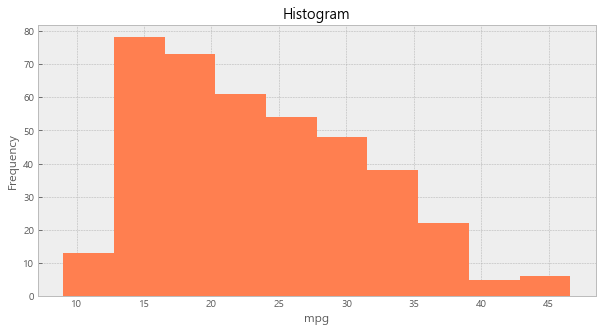

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('bmh')

# read_csv() 함수로 df 생성
# 열을 따로 지정해주지 않기 위해 header=None 옵션 사용
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin', 'name']

df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5)) # bins: 나눌 구간수

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

---
## 산점도
산점도(scatter plot)는 서로 다른 두 변수 사이의 관계를 표현
- plot() 함수에 kind='scatter' 옵션을 사용
 - x = 'weight' 옵션을 사용하여 x축에 위치할 변수(데이터프레임의 열)를 선택
 - y = 'mpg' 옵션을 사용하여 y축에 위치할 변수를 선택
 - 점의 색상(c)과 크기(s)를 설정하는 옵션 추가

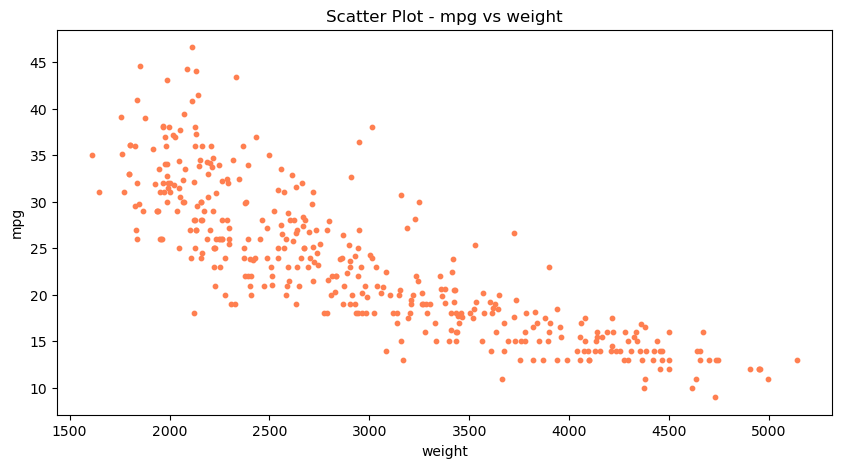

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('default')

# read_csv() 함수로 df 생성
# 열을 따로 지정해주지 않기 위해 header=None 옵션 사용
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin', 'name']

df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5)) # s는 점의크기

plt.title('Scatter Plot - mpg vs weight')
plt.show()

### 산점도에서 새로운 변수를 추가하여 점의 크기 또는 색상으로 표현 가능
- 새로운 변수로 실린더 개수('cylinders' 열)를 추가
- 실린더 개수를 나타내는 정수를 그대로 쓰는 대신, 해당 열의 최대값 대비 상대적 크기를 나타내는 비율을 계산하여 cylinders_size 변수에 저장
- 점의 크기에 변화를 주기 때문에 비눗방울과 비슷하여 '버블 차트'라고 부름


### 버블 차트 예제

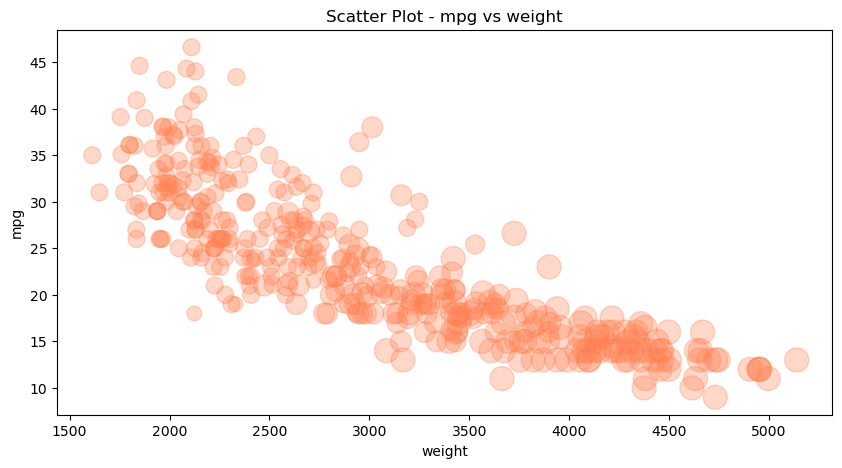

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('default')

# read_csv() 함수로 df 생성
# 열을 따로 지정해주지 않기 위해 header=None 옵션 사용
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin', 'name']

# cylinders 개수의 상대적 비율을 계산
cylinders_size = df.cylinders / df.cylinders.max() * 300

df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=cylinders_size, figsize=(10, 5), alpha=0.3) # s는 점의크기
plt.title('Scatter Plot - mpg vs weight')
plt.show()

In [150]:
df.cylinders / df.cylinders.max()

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
393    0.5
394    0.5
395    0.5
396    0.5
397    0.5
Name: cylinders, Length: 398, dtype: float64

---
# 그래프를 그림 파일로 저장
- savefig() 함수로 파일을 저장
 - 일반 파일로 저장(scatter.png)
 - 배경을 투명하게 하여 저장(scatter_transparent.png)
- markder='+' 옵션으로 점의 모양을 십자(+)로 표시
- 색상을 정하는 컬러맵을 사용: ex) cmap=


그림 파일 저장 예제

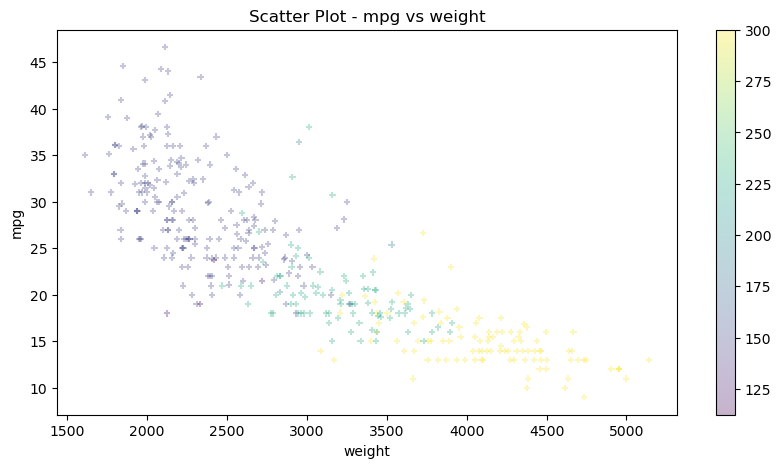

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('default')

# read_csv() 함수로 df 생성
# 열을 따로 지정해주지 않기 위해 header=None 옵션 사용
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin', 'name']

# cylinders 개수의 상대적 비율을 계산
cylinders_size = df.cylinders / df.cylinders.max() * 300

df.plot(kind='scatter', x='weight', y='mpg', marker='+', c=cylinders_size, cmap='viridis',
        figsize=(10, 5), alpha=0.3, ) # s는 점의크기
plt.title('Scatter Plot - mpg vs weight')

plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent=True) # 배경 투명하게 저장


plt.show()

---
## 파이 차트
파이 차트(pie chart)는 원을 파이 조각처럼 나누어서 표현
- 데이터 값의 크기에 비례
- plot() 함수에 kind='pie' 옵션을 사용

파이 차트 만들기
- 데이터 개수를 세기 위해 숫자 1을 원소로 갖는 'count' 열을 생성
- groupby() 함수를 사용하여 '제조국가'를 3개의 그룹으로 나눔
- sum() 함수를 사용하여 그룹별 개수의 합계를 계산

파이 차트 예제

          mpg  cylinders  displacement    weight  acceleration  model year  \
USA    5000.8       1556       61229.5  837121.0        3743.4       18827   
EU     1952.4        291        7640.0  169631.0        1175.1        5307   
JAPAN  2405.6        324        8114.0  175477.0        1277.6        6118   

       count  
USA      249  
EU        70  
JAPAN     79  


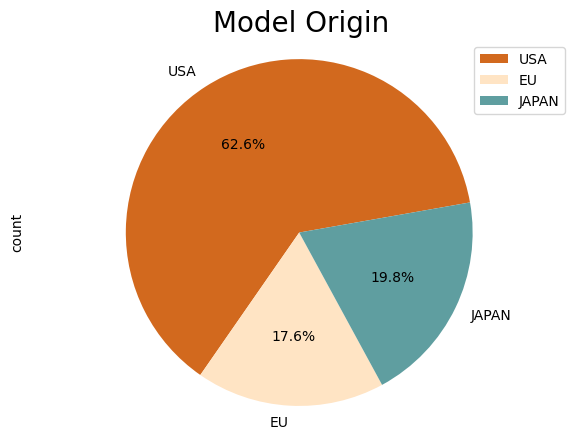

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('default')

# read_csv() 함수로 df 생성
# 열을 따로 지정해주지 않기 위해 header=None 옵션 사용
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin', 'name']
#---------------

# 데이터 개수 카운트를 위해 값 1을 원소로 갖는 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum() #groupby로 묶인애가 인덱스로 잡힘

# 제조국가 이름 변경
df_origin.index = ['USA', 'EU', 'JAPAN']
print(df_origin)

# count 열을 사용하여 파이 차트 만들기
df_origin['count'].plot(kind='pie', figsize=(7, 5), autopct='%0.1f%%', startangle=10, colors=['chocolate', 'bisque', 'cadetblue'])

plt.title('Model Origin', size=20)
plt.axis('equal') # 원 위치
plt.legend(labels=df_origin.index, loc='upper right')

plt.show()

## 박스 플롯
제조국가별 연비 분포를 보여주는 박스 플롯 그리기
- 그림틀을 2개의 axe 객체로 분할하기 위해서 add_subplt() 함수 사용
 - 수직 박스 플롯은 vert=True 옵션 사용
 - 수평 박스 플롯은 vert=False 옵션 사용
- 각 axe 객체에 박스 플롯을 그리는 boxplot() 함수를 사용


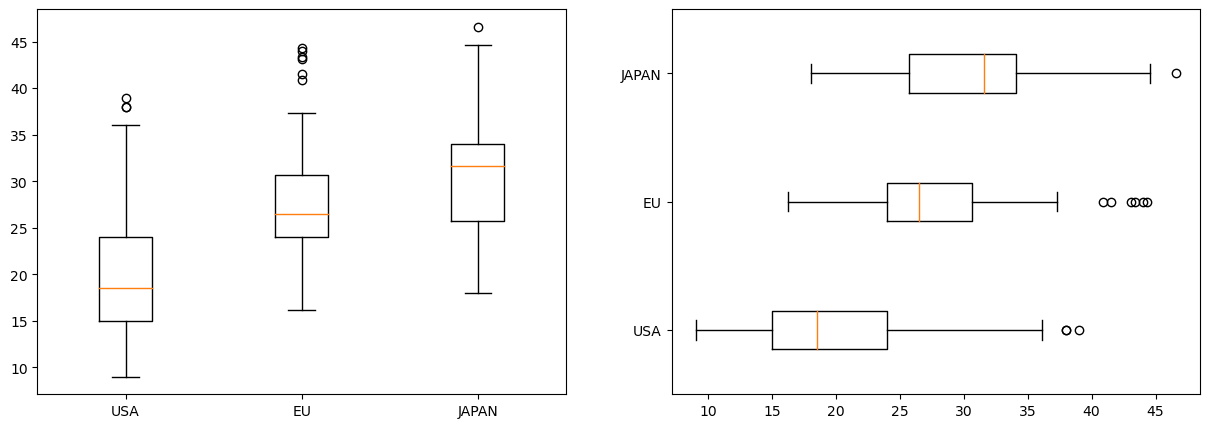

In [182]:
import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('default')

# read_csv() 함수로 df 생성
# 열을 따로 지정해주지 않기 위해 header=None 옵션 사용
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin', 'name']
#---------------------2

# 그래프 객체 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 박스 플롯 만들기
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
            labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
            labels=['USA', 'EU', 'JAPAN'], 
            vert = False)

plt.show()